## Introduction to Machine Learning with Python - part4
#### Scikit-learn을 중심으로 ML 관련 내용을 정리하였습니다. 파이썬 라이브러리를 활용한 머신러닝(번역개정2판, 안드레아스 뮐러, 세라 가이도 지음)을 참고하였습니다.

## 5. 모델 평가와 성능 향상
### 5.1 교차 검증(cross-validation)
#### 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 통계적 평가 방법 / 데이터를 여러 번 반복해서 나누고 여러 모델을 학습
### k-fold cross-validation : 데이터를 k개의 fold(부분집합)으로 나눈 후 하나씩 test 데이터로 활용 / 총 k번 반복

In [2]:
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc
#### matplotlib 한글 세팅
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import sklearn

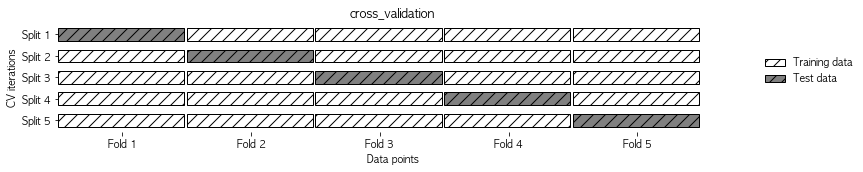

In [3]:
mglearn.plots.plot_cross_validation()

#### 5.1.1 sckit-learn의 교차 검증

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수 : ', scores)

scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print('교차 검증 점수 : ', scores)

print('교차 검증 평균 점수 : {:.2f}'.format(scores.mean()))

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 점수 :  [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
교차 검증 평균 점수 : 0.97


In [9]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.02830982, 0.025172  , 0.01653695, 0.01437116, 0.01208901]),
 'score_time': array([0.00044918, 0.00028801, 0.00019789, 0.00015783, 0.000144  ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

#### 5.1.2 교차 검증의 장점
#### 테스트 세트에 모든 샘플이 한 번 씩 포함됨 / 훈련 데이터에 얼마나 민감한 지 알 수 있음 / 데이터를 효과적으로 사용할 수 있음

#### 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print('Iris 레이블 : \n', iris.target)

Iris 레이블 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


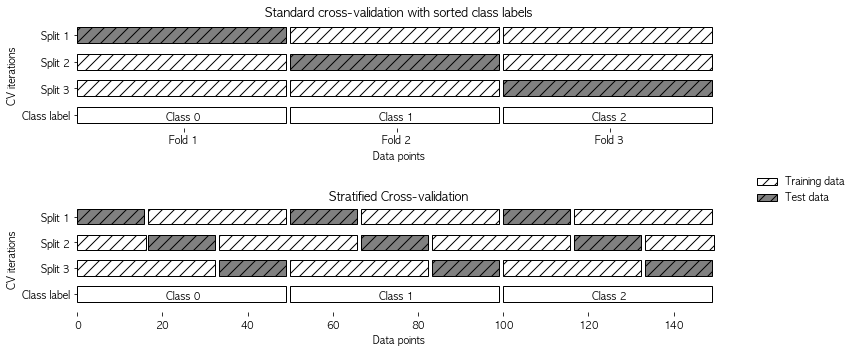

In [11]:
mglearn.plots.plot_stratified_cross_validation()

In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print('교차 검증 점수 : \n', cross_val_score(logreg, iris.data, iris.target, cv = kfold))

kfold = KFold(n_splits=3)
print('교차 검증 점수 : \n', cross_val_score(logreg, iris.data, iris.target, cv = kfold))

kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수 : \n', cross_val_score(logreg, iris.data, iris.target, cv = kfold))

교차 검증 점수 : 
 [1.         1.         0.86666667 0.93333333 0.83333333]
교차 검증 점수 : 
 [0. 0. 0.]
교차 검증 점수 : 
 [0.98 0.96 0.96]


In [16]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 점수 : ', len(scores))

print('교차 검증 평균 점수 : {:.2f}'.format(scores.mean()))

교차 검증 점수 :  150
교차 검증 평균 점수 : 0.97


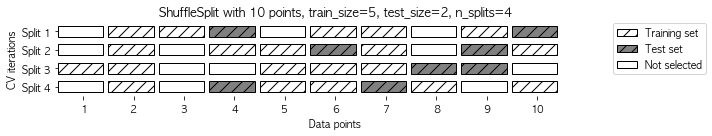

In [17]:
mglearn.plots.plot_shuffle_split()

In [18]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수 : ', scores)

교차 검증 점수 :  [0.94666667 0.96       1.         0.98666667 0.98666667 0.96
 0.93333333 0.97333333 0.96       0.98666667]


In [19]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups=groups, cv =GroupKFold(n_splits=3))
print('교차 검증 점수 : ', scores)

교차 검증 점수 :  [0.75       0.6        0.66666667]


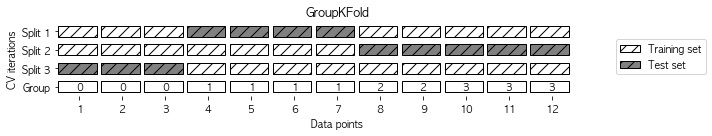

In [20]:
mglearn.plots.plot_group_kfold()

#### 5.1.4 반복 교착 검증

In [22]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

from sklearn.model_selection import RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv = rskfold)
print('교차 검증 점수 : \n'.format(scores))
print('교차 검증 평균 점수 : {:.3f}'.format(scores.mean()))

교차 검증 점수 : 

교차 검증 평균 점수 : 0.965


### 5.2 그리드 서치
#### 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도
#### 5.2.1 간단한 그리드 서치

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('훈련 세트의 크기 {}, 테스트 세트의 크기 {}'.format(X_train.shape[0], X_test.shape[0]))

best_scores = 0

for g in [.001, .01, .1, 1, 10, 100]:
    for c in [.001, .01, .1, 1, 10, 100]:
        svm = SVC(gamma=g, C =c)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score > best_scores:
            best_scores = score
            best_para = {'C' : c, 'gamma' : g}

print('최고 점수 : {:.2f}'.format(best_scores))
print('최적 매개변수 : ', best_para)

훈련 세트의 크기 112, 테스트 세트의 크기 38
최고 점수 : 0.97
최적 매개변수 :  {'C': 100, 'gamma': 0.001}


#### 5.2.2 매개변수 과대적합과 검증 세트

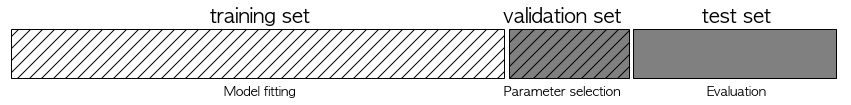

In [24]:
mglearn.plots.plot_threefold_split()

In [25]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=1)
print('훈련 세트의 크기 {}, 검증 세트의 크기 {}, 테스트 세트의 크기 {}'.format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

best_scores = 0

for g in [.001, .01, .1, 1, 10, 100]:
    for c in [.001, .01, .1, 1, 10, 100]:
        svm = SVC(gamma=g, C =c)
        svm.fit(X_train, y_train)
        score = svm.score(X_val, y_val)
        
        if score > best_scores:
            best_scores = score
            best_para = {'C' : c, 'gamma' : g}

svm = SVC(**best_para)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print('검증 최고 점수 : {:.2f}'.format(best_scores))
print('최적 매개변수 : ', best_para)
print('최적 매개변수 하 테스트 점수 : {:.2f}'.format(test_score))


훈련 세트의 크기 84, 검증 세트의 크기 28, 테스트 세트의 크기 38
검증 최고 점수 : 0.96
최적 매개변수 :  {'C': 10, 'gamma': 0.001}
최적 매개변수 하 테스트 점수 : 0.92


#### 5.2.3 교차 검증을 사용한 그리드 서치

In [ ]:
for g in [.001, .01, .1, 1, 10, 100]:
    for c in [.001, .01, .1, 1, 10, 100]:
        svm = SVC(gamma=g, C =c)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_scores:
            best_scores = score
            best_para = {'C' : c, 'gamma' : g}

svm = SVC(**best_para)
svm.fit(X_trainval, y_trainval)

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

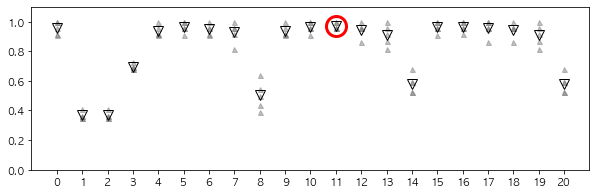

In [26]:
mglearn.plots.plot_cross_val_selection()

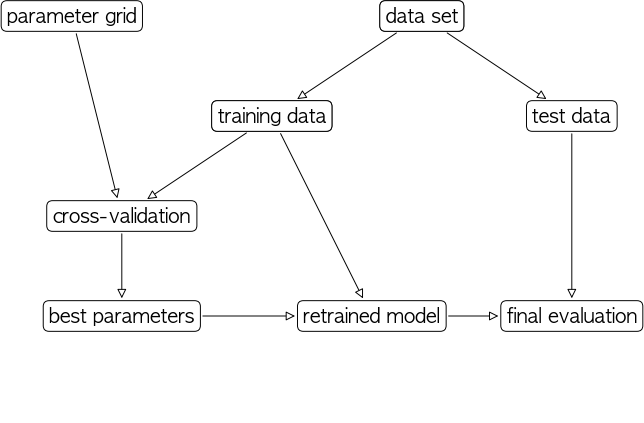

In [27]:
mglearn.plots.plot_grid_search_overview()

In [28]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

print('매개변수 그리드 : \n', param_grid)

매개변수 그리드 : 
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print('테스트 세트 점수 : {:.2f}'.format(grid_search.score(X_test, y_test)))
print('최적 매개변수 : ', grid_search.best_params_)
print('최고 교차 검증 점수 : {:.2f}'.format(grid_search.best_score_))
print('최고 성능 모델 : \n', grid_search.best_estimator_)

테스트 세트 점수 : 0.97
최적 매개변수 :  {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수 : 0.97
최고 성능 모델 : 
 SVC(C=10, gamma=0.1)


In [33]:
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.001496,0.000834,0.000951,0.000775,0.00066
std_fit_time,0.000625,0.000044,0.00008,0.000034,0.000032
mean_score_time,0.000649,0.000445,0.00051,0.00042,0.000355
std_score_time,0.000281,0.000021,0.000051,0.000034,0.000031
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


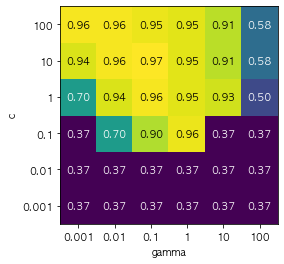

In [34]:
scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel='c', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')

In [35]:
param_grid = [{'kernel' : ['rbf'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel' : ['linear'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]

print('그리드 목록 :\n', param_grid)

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print('최적 파라미터 : ', grid_search.best_params_)
print('최고 교차 검증 점수 :{:.2f}'.format(grid_search.best_score_))

그리드 목록 :
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
최적 파라미터 :  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수 :0.97


In [36]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.002042,0.000679,0.000895,0.000629,0.000599,0.000577,0.000541,0.000539,0.000538,0.000541,0.000557,0.00057,0.000532,0.000529,0.000461,0.000485,0.000558,0.000579,0.000541,0.000446,0.000355,0.000417,0.000629,0.000645,0.000416,0.000324,0.000307,0.000381,0.000632,0.000645,0.000322,0.000301,0.0003,0.000389,0.000626,0.00065,0.00072,0.000412,0.000334,0.000312,0.000312,0.000314
std_fit_time,0.002651,0.000059,0.000222,0.000018,0.000032,0.000032,0.000005,0.000006,0.000005,0.000004,0.000013,0.000005,0.000002,0.000006,0.000004,0.000013,0.000003,0.000009,0.000012,0.000045,0.000017,0.000026,0.00001,0.000006,0.000012,0.000005,0.00001,0.000004,0.000006,0.000007,0.000006,0.000011,0.000012,0.000008,0.00001,0.000012,0.000486,0.000003,0.000005,0.000009,0.00001,0.00002
mean_score_time,0.000581,0.000342,0.00039,0.000328,0.000319,0.000304,0.000288,0.000288,0.000292,0.000289,0.000298,0.000289,0.000284,0.000284,0.000275,0.000265,0.00029,0.000288,0.000285,0.000293,0.000229,0.00021,0.000273,0.000293,0.000254,0.000196,0.000175,0.000196,0.000269,0.00029,0.000196,0.000166,0.000167,0.000196,0.000267,0.00029,0.000184,0.000171,0.000158,0.000147,0.000145,0.000143
std_score_time,0.000435,0.000019,0.00005,0.000007,0.000026,0.000014,0.000003,0.000006,0.000005,0.000005,0.000017,0.000002,0.000002,0.000001,0.000003,0.000006,0.000004,0.000003,0.000003,0.00005,0.000035,0.00001,0.000004,0.000004,0.000006,0.000002,0.000002,0.000002,0.000004,0.000003,0.000003,0.000002,0.000003,0.000004,0.000003,0.000002,0.000012,0.000002,0.000003,0.000001,0.000004,0.000001
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel'

### 5.3 평가 지표와 측정
#### 5.3.1 최종 목표를 기억하라
#### 비즈니스 임팩트 : 머신러닝 애플리케이션에서 특정 알고리즘을 선택하여 나타난 결과
#### 5.3.2 이진 분류의 평가 지표
#### false positive : 실제로는 negtive이지만 모델은 positive로 예측 -> type 1 error
#### false negative : 실제로는 positivie이지만 모델은 negative로 예측 -> type 2 error
#### 불균형 데이터(imbalanced datasets) : 한 클래스가 다른 클래스보다 훨씬 많은 데이터셋

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('예측된 유니크 레이블 : ', np.unique(pred_most_frequent))
print('테스트 점수 : {:.2f}'.format(dummy_majority.score(X_test, y_test)))


예측된 유니크 레이블 :  [False]
테스트 점수 : 0.90


In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수 : {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수 : 0.92


In [44]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수 : {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수 : {:.2f}'.format(logreg.score(X_test, y_test)))

dummy 점수 : 0.78
logreg 점수 : 0.98


In [45]:
#### 오차행렬 : 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬 : \n', confusion)

오차 행렬 : 
 [[402   1]
 [  6  41]]


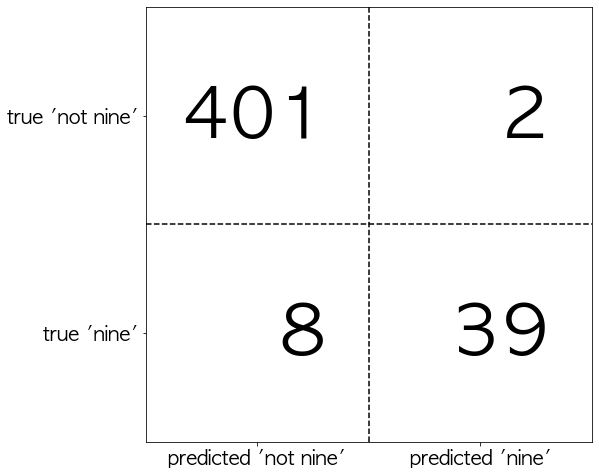

In [46]:
mglearn.plots.plot_confusion_matrix_illustration()

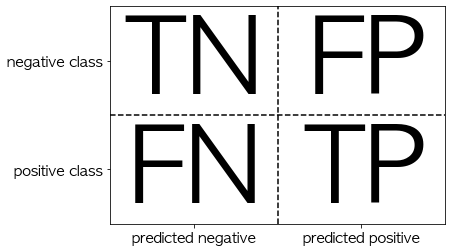

In [47]:
mglearn.plots.plot_binary_confusion_matrix()

In [51]:
print('빈도 기반 더미 모델 : ')
print(confusion_matrix(y_test, pred_most_frequent))
print('\n무작위 기반 더미 모델 : ')
print(confusion_matrix(y_test, pred_dummy))
print('\n결정트리 : ')
print(confusion_matrix(y_test, pred_tree))
print('\n로지스틱 회귀  : ')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델 : 
[[403   0]
 [ 47   0]]

무작위 기반 더미 모델 : 
[[352  51]
 [ 45   2]]

결정트리 : 
[[390  13]
 [ 24  23]]

로지스틱 회귀  : 
[[402   1]
 [  6  41]]


#### 정확도 : 정확히 예측한 수 / 전체 샘플 수 
#### 정밀도 : 진짜 양성(TP) / 양성으로 예측된 것(TP+FP) -> 거짓양성(FP)의 수를 줄이는 것이 목표일 떄 사용, 양성 예측도(PPV)
#### 재현율 : 진짜 양성(TP) / 전체 양성 샘플 수 (TP+FN) -> 모든 양성 샘플을 식별해야 할 때 사용, FN을 피하는 것이 중요할 때, 민감도, 적중률, 진짜 양성 비율(TPR)
#### f1-score : 정밀도와 재현율의 조화평균, 둘을 동시에 고려

In [53]:
from sklearn.metrics import f1_score
print('빈도 기반 더미 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('무작위 더미 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('트리 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_tree)))
print('로지스틱 회귀 모델의 f1 score : {:.2f}'.format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score : 0.00
무작위 더미 모델의 f1 score : 0.04
트리 모델의 f1 score : 0.55
로지스틱 회귀 모델의 f1 score : 0.92


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['9 아님', '9'], zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [55]:
print(classification_report(y_test, pred_dummy, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.89      0.87      0.88       403
           9       0.04      0.04      0.04        47

    accuracy                           0.79       450
   macro avg       0.46      0.46      0.46       450
weighted avg       0.80      0.79      0.79       450



In [56]:
print(classification_report(y_test, pred_logreg, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [57]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)


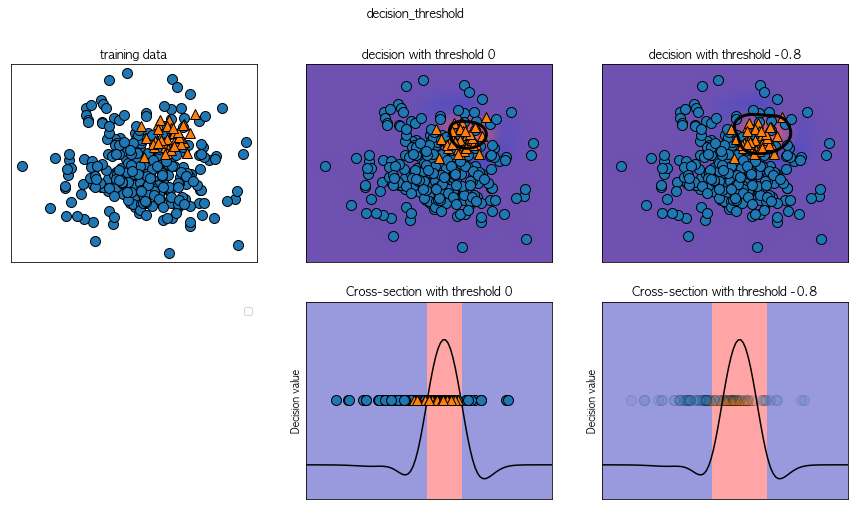

In [58]:
mglearn.plots.plot_decision_threshold()

In [59]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [60]:
#### 클래스 1의 재현율을 높이기 위해 FP가 증가하여 정밀도가 감소하는 것을 감안
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



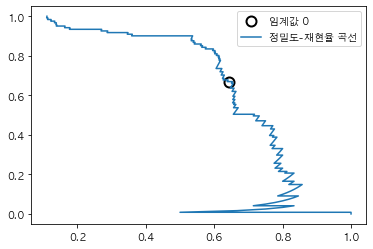

In [64]:
from sklearn.metrics import precision_recall_curve

X, y  = make_blobs(n_samples=(4000, 500), cluster_std=[7.0,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label ='임계값 0', fillstyle='none', c='k', mew =2)
plt.plot(precision, recall, label= '정밀도-재현율 곡선')
plt.legend(loc='best')

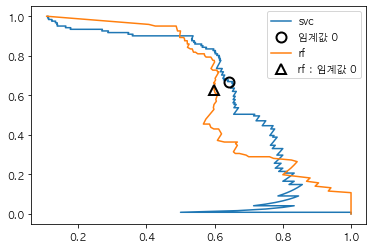

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(precision, recall, label = 'svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label ='임계값 0', fillstyle='none', c='k', mew =2)
plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label ='rf : 임계값 0', fillstyle='none', c='k', mew =2)
plt.legend(loc='best')

In [66]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('랜덤 포레스트의 평균 정밀도 : {:.3f}'.format(ap_rf))
print('svc의 평균 정밀도 : {:.3f}'.format(ap_svc))

랜덤 포레스트의 평균 정밀도 : 0.660
svc의 평균 정밀도 : 0.666


#### ROC곡선 : 여러 임계값에서 분류기의 특성을 분석하는데 활용 / 진짜양성비율(TPR, 재현율)과 거짓양성비율(FPR) 활용

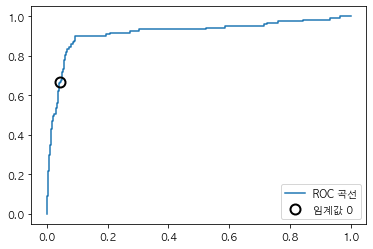

In [69]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC 곡선')
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='임계값 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

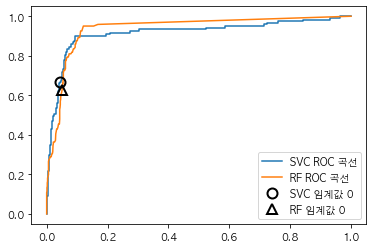

In [71]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='SVC ROC 곡선')
plt.plot(fpr_rf, tpr_rf, label='RF ROC 곡선')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='SVC 임계값 0', fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label='RF 임계값 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [72]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('랜덤 포레스트의 AUC : {:.3f}'.format(rf_auc))
print('SVC의 AUC : {:.3f}'.format(svc_auc))

랜덤 포레스트의 AUC : 0.937
SVC의 AUC : 0.916


#### 5.3.3 다중 분류의 평가 지표
#### 다중 분류의 정확도는 정확히 분류된 샘플의 비율로 정의 -> 클래스가 불균형 할 때는 좋은 평가 방법이 되지 못함

In [73]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print('정확도 : {:.3f}'.format(accuracy_score(y_test, pred)))
print('오차 행렬 : \n', confusion_matrix(y_test, pred))

정확도 : 0.953
오차 행렬 : 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


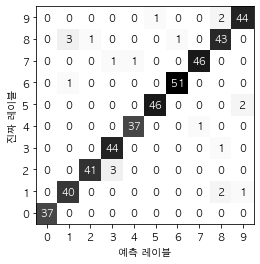

In [75]:
scores_images = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='예측 레이블', ylabel = '진짜 레이블',
                                      xticklabels = digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')

In [77]:
print(classification_report(y_test, pred))
print('micro 평균 f1 점수 : {:.3f}'.format(f1_score(y_test, pred, average='micro')))
print('macro 평균 f1 점수 : {:.3f}'.format(f1_score(y_test, pred, average='macro')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

micro 평균 f1 점수 : 0.953
macro 평균 f1 점수 : 0.954
